In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = "data/"
file_name_train = "train.csv"
file_name_test = "test.csv"
df_train = pd.read_csv(os.path.join(path, file_name_train))
df_test = pd.read_csv(os.path.join(path, file_name_test))

## 1. Exploring the dataset

In [3]:
df_train.head()
# df_test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [5]:
df_train.shape

(891, 8)

In [6]:
df_train[df_train.isnull().any(axis=1)].count()
df_train.dropna(inplace=True)

In [7]:
df_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [8]:
pd.crosstab(df_train['Sex'], df_train['Survived'])
pd.crosstab(df_train['Pclass'], df_train['Survived'])

Survived,0,1
Pclass,,
1,64,120
2,90,83
3,270,85


<AxesSubplot:>

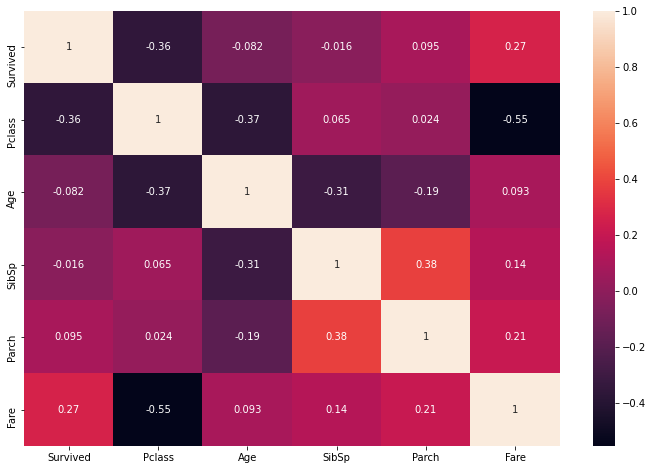

In [9]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(df_train.corr(), annot=True)

## 2. Pre-processing the dataset

In [10]:
from sklearn import preprocessing

label_encoding = preprocessing.LabelEncoder()
df_train['Sex'] = label_encoding.fit_transform(df_train['Sex'].astype(str))

df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [11]:
df_train = pd.get_dummies(df_train, columns=['Embarked'])

In [12]:
df_train = df_train.sample(frac=1).reset_index(drop=True)

In [13]:
df_train.to_csv(os.path.join(path, 'train_processed.csv'), index=False)

## 3. Training ML model

In [15]:
from sklearn.model_selection import train_test_split

X = df_train.drop(['Survived'], axis=1)
Y = df_train['Survived']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [16]:
from sklearn.linear_model import LogisticRegression
# penalty = l2: default value, regularizing by applying a penalty on overly complex models.
# l2 penalty uses the l2 norm of the coefficient of the model, i.e. the sum of the squares of the coefficients.
# C stands for inverse of regularization strength, smaller values indicate stronger regularization.
# liblinear: ok for small datasets like Titanic
logistic_model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear').fit(x_train, y_train)
print('Training score: ', logistic_model.score(x_train, y_train))

Training score:  0.8084358523725835


In [17]:
y_pred = logistic_model.predict(x_test)

## 4. Evaluating the model: Accuracy, Precision and Recall

In [18]:
pred_results = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
pred_results.head()

,y_test,y_pred
389,0,0
41,1,1
175,1,0
549,1,1
334,0,0


In [19]:
titanic_crosstab = pd.crosstab(pred_results.y_pred, pred_results.y_test)
titanic_crosstab

y_test,0,1
y_pred,,
0,73,18
1,11,41


In [20]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [21]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# How many of the predicted values did the model get right?
print("accuracy_score:", acc)
# How many of the passengers that the model thought survived actually did survive?
print("precision_score:", prec)
# How many of the actual survivors did the model correctly predict?
print("recall_score:", recall)

accuracy_score: 0.7972027972027972
precision_score: 0.7884615384615384
recall_score: 0.6949152542372882


In [22]:
result_dict = {}

In [23]:
def summarize_classification(y_test, y_pred):

    acc = accuracy_score(y_test, y_pred, normalize=True)
    num_acc = accuracy_score(y_test, y_pred, normalize=False)

    prec = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    return { 'accuracy': acc, 'precision': prec, 'recall': recall, 'accuracy_count': num_acc }


In [24]:
def build_model(classifier_fn, name_of_y_col, names_of_x_cols, dataset, test_frac=0.2):
    
    X = dataset[names_of_x_cols]
    Y = dataset[name_of_y_col]

    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_frac)

    model = classifier_fn(x_train, y_train)

    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)

    train_summary = summarize_classification(y_train, y_pred_train)
    test_summary = summarize_classification(y_test, y_pred)

    pred_results = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
    model_crosstab = pd.crosstab(pred_results.y_pred, pred_results.y_test)

    return { 'training': train_summary, 'test': test_summary, 'confusion_matrix': model_crosstab }

In [25]:
def compare_results(result_dict):
    for key in result_dict:
        print('Classification: ', key)

        print()
        print('Training data')
        for score in result_dict[key]['training']:
            print(score, result_dict[key]['training'][score])
        
        print()
        print('Test data')
        for score in result_dict[key]['test']:
            print(score, result_dict[key]['test'][score])
        
        print()

In [26]:
def logistic_fn(x_train, y_train):
    model = LogisticRegression(solver='liblinear')
    model.fit(x_train, y_train)
    return model

In [27]:
FEATURES = list(df_train.columns[1:])
result_dict['survived - logistic'] = build_model(logistic_fn, 'Survived', FEATURES, df_train)

In [28]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
def linear_discriminant_fn(x_train, y_train, solver='svd'):
    model = LinearDiscriminantAnalysis(solver=solver)
    model.fit(x_train, y_train)
    return model

In [29]:
result_dict['survived - linear_discriminant_analysis'] = build_model(linear_discriminant_fn, 'Survived', FEATURES[:-1], df_train)

In [30]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
def quadratic_discriminant_fn(x_train, y_train):
    model = QuadraticDiscriminantAnalysis()
    model.fit(x_train, y_train)
    return model

In [31]:
result_dict['survived - quadratic_discriminant_analysis'] = build_model(quadratic_discriminant_fn, 'Survived', FEATURES[:-1], df_train)

In [32]:
from sklearn.linear_model import SGDClassifier 
def sgd_fn(x_train, y_train, max_iter=10000, tol=1e-3):
    model = SGDClassifier(max_iter=max_iter, tol=tol)
    model.fit(x_train, y_train)
    return model

In [33]:
result_dict['survived - sgd'] = build_model(sgd_fn, 'Survived', FEATURES, df_train)

C:\Users\sebas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sebas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
from sklearn.svm import LinearSVC 
def linear_svc_fn(x_train, y_train, C=1.0, max_iter=1000, tol=1e-3):
    model = LinearSVC(C=C, max_iter=max_iter, tol=tol, dual=False)
    model.fit(x_train, y_train)
    return model

In [35]:
result_dict['survived - linear_svc'] = build_model(linear_svc_fn, 'Survived', FEATURES, df_train)

In [36]:
from sklearn.neighbors import RadiusNeighborsClassifier
def radius_neighbors_fn(x_train, y_train, radius=40.0):
    model = RadiusNeighborsClassifier(radius=radius)
    model.fit(x_train, y_train)
    return model

In [37]:
result_dict['survived - radius_neighbors'] = build_model(radius_neighbors_fn, 'Survived', FEATURES, df_train)

In [38]:
from sklearn.tree import DecisionTreeClassifier
def decision_tree_fn(x_train, y_train, max_depth=None, max_features=None):
    model = DecisionTreeClassifier(max_depth=max_depth, max_features=max_features)
    model.fit(x_train, y_train)
    return model

In [39]:
result_dict['survived - decision_tree'] = build_model(decision_tree_fn, 'Survived', FEATURES, df_train)

In [40]:
from sklearn.naive_bayes import GaussianNB
def naive_bayes_fn(x_train, y_train, priors=None):
    model = GaussianNB(priors=priors)
    model.fit(x_train, y_train)
    return model

In [41]:
result_dict['survived - naive_bayes'] = build_model(naive_bayes_fn, 'Survived', FEATURES, df_train)

In [42]:
compare_results(result_dict)

Classification:  survived - logistic

Training data
accuracy 0.7908611599297012
precision 0.7722772277227723
recall 0.6812227074235808
accuracy_count 450

Test data
accuracy 0.8111888111888111
precision 0.7962962962962963
recall 0.7288135593220338
accuracy_count 116

Classification:  survived - linear_discriminant_analysis

Training data
accuracy 0.7961335676625659
precision 0.7655502392344498
recall 0.7048458149779736
accuracy_count 453

Test data
accuracy 0.8111888111888111
precision 0.8541666666666666
recall 0.6721311475409836
accuracy_count 116

Classification:  survived - quadratic_discriminant_analysis

Training data
accuracy 0.7996485061511424
precision 0.7632850241545893
recall 0.7085201793721974
accuracy_count 455

Test data
accuracy 0.7762237762237763
precision 0.7619047619047619
recall 0.7384615384615385
accuracy_count 111

Classification:  survived - sgd

Training data
accuracy 0.5940246045694201
precision 0.0
recall 0.0
accuracy_count 338

Test data
accuracy 0.601398601398

## 4. Hyperparameter tuning

In [43]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': [2,4,5,7,9,10]}
grid_search = GridSearchCV(DecisionTreeClassifier(), parameters, cv=3, return_train_score=True)
grid_search.fit(x_train, y_train)
grid_search.best_params_

{'max_depth': 5}

In [44]:
decision_tree_model = DecisionTreeClassifier(max_depth=grid_search.best_params_['max_depth']).fit(x_train, y_train)

In [45]:
y_pred = decision_tree_model.predict(x_test)
summarize_classification(y_test, y_pred)

{'accuracy': 0.8461538461538461,
 'precision': 0.9111111111111111,
 'recall': 0.6949152542372882,
 'accuracy_count': 121}

In [46]:
parameters = {'penalty': ['l1', 'l2'], 'C': [0.1,0.4,0.8,1,2,5]}
grid_search = GridSearchCV(LogisticRegression(solver='liblinear'), parameters, cv=3, return_train_score=True)
grid_search.fit(x_train, y_train)
grid_search.best_params_

{'C': 5, 'penalty': 'l1'}

In [47]:
logistic_model = LogisticRegression(solver='liblinear', penalty=grid_search.best_params_['penalty'], C=grid_search.best_params_['C']).fit(x_train,y_train)

In [48]:
y_pred = logistic_model.predict(x_test)
summarize_classification(y_test, y_pred)

{'accuracy': 0.7972027972027972,
 'precision': 0.7777777777777778,
 'recall': 0.711864406779661,
 'accuracy_count': 114}

## 5. Predict on test data

In [49]:
df_test_passengerId = df_test['PassengerId']
df_test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [50]:
df_test['Sex'] = label_encoding.fit_transform(df_test['Sex'].astype(str))
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,Q
1,3,0,47.0,1,0,7.0000,S
2,2,1,62.0,0,0,9.6875,Q
3,3,1,27.0,0,0,8.6625,S
4,3,0,22.0,1,1,12.2875,S


In [51]:
df_test = pd.get_dummies(df_test, columns=['Embarked'])
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,34.5,0,0,7.8292,0,1,0
1,3,0,47.0,1,0,7.0000,0,0,1
2,2,1,62.0,0,0,9.6875,0,1,0
3,3,1,27.0,0,0,8.6625,0,0,1
4,3,0,22.0,1,1,12.2875,0,0,1


In [70]:
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].mean())
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].mean())

In [74]:
model = QuadraticDiscriminantAnalysis()
model.fit(x_train, y_train)

y_pred = model.predict(df_test)

C:\Users\sebas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [78]:
y_pred = decision_tree_model.predict(df_test)

## 6. Save predictions

In [79]:
df_results = pd.DataFrame({'PassengerId': df_test_passengerId, 'Survived': y_pred})

In [80]:
df_results

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [81]:
df_results.to_csv(os.path.join(path, 'results_decision_trees.csv'), index=False)